In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.9MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 47.4MB/s ta 0:00:01
    100% |████████████████████████████████| 10.4MB 5.0MB/s  eta 0:00:01
    100% |████████████████████████████████| 194kB 60.0MB/s eta 0:00:01
    100% |████████████████████████████████| 7.3MB 7.1MB/s  eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 81kB 50.0MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 40.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
Successfully built ujson holidays
  Found existing installation: python-dateut

In [3]:
# !pip install gluonts=="0.4.1"

In [4]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [5]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar
# from utils_gluonts11_deepstate import deep_state


INFO:root:Using CPU


In [6]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_finance', 'm4_quarterly_id', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_qu

#### Note

In SageMaker data are saved into the following folders (example shows m4_weekly):

```
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json
```

In [7]:
dataname = "m4_weekly"
dataset = get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_weekly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json


In [8]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length
print("length train dataset:", len(dataset.train))
print("length test dataset:", len(dataset.test))

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train dataset: 359
length test dataset: 359


In [9]:
train_entry

{'start': Timestamp('1750-01-04 00:00:00', freq='W-SUN'),
 'target': array([ 1089.2 ,  1078.91,  1079.88, ..., 36565.18, 36565.18, 35397.16],
       dtype=float32),
 'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source=Span(path=PosixPath('/home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json'), line=1), row=1)}

## Plot Series

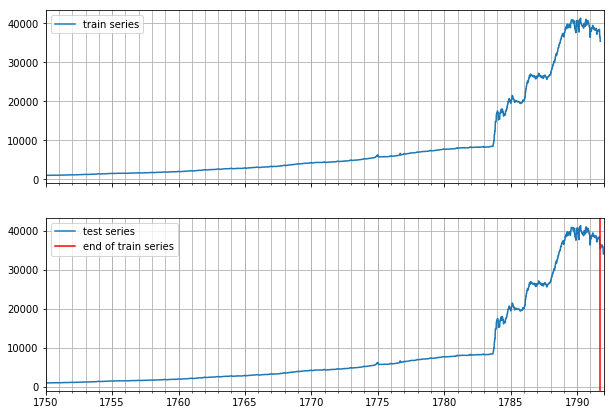

In [10]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [11]:
print("start:", dict(train_entry)["start"])
print("target:", dict(train_entry)["target"][:7])
print("feat_static_cat:", dict(train_entry)["feat_static_cat"])
print("length:", len(dataset.train))

start: 1750-01-04 00:00:00
target: [1089.2  1078.91 1079.88 1063.58 1060.61 1056.93 1056.63]
feat_static_cat: [0]
length: 359


In [12]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepstate import DeepStateEstimator

INFO:root:Using CPU


In [13]:
#########################
### deepstate wrapper ###

# data = "m4_yearly_other"
# seed = 44
# epochs = 500
# num_batches = 100
# batch_size = 32

def deepstate(dataname, seed=42, epochs=100, num_batches=50):
    
    mx.random.seed(seed)
    np.random.seed(seed)

    dataset = get_dataset(dataname, regenerate=False)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
        )

    cardinality = int(dataset.metadata.feat_static_cat[0].cardinality)
    estimator = DeepStateEstimator(
        trainer=trainer,
        cardinality=[cardinality],
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True,
        )

    predictor=estimator.train(dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
            dataset.test, predictor=predictor, num_samples=100
        )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = num_batches
    output["data"] = dataname

    df = pd.DataFrame([output])
    return df

## Results

In [19]:
results = pd.DataFrame()

for i in range(65, 72):
    print("Seed:", i)
    df=deepstate(dataname="m4_yearly", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepStateTrainingNetwork: 1179349


Seed: 65


100%|██████████| 50/50 [00:00<00:00, 63.23it/s, avg_epoch_loss=0.447]
INFO:root:Epoch[0] Elapsed time 0.800 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.446581
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.00it/s, avg_epoch_loss=0.00218]
INFO:root:Epoch[1] Elapsed time 0.822 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.002182
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.63it/s, avg_epoch_loss=-.135]
INFO:root:Epoch[2] Elapsed time 0.764 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.135334
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.21it/s, avg_epoch_loss=-.609]
INFO:root:Epoch[3] Elapsed time 0.746 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.609359
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.10it/s, avg_epoch_loss=-.497]
INFO:root:Epoch[4] Elapsed time 0.758 seconds
INFO:root:Ep

100%|██████████| 50/50 [00:00<00:00, 66.91it/s, avg_epoch_loss=-.892]
INFO:root:Epoch[37] Elapsed time 0.749 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-0.892017
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.68it/s, avg_epoch_loss=-1.09]
INFO:root:Epoch[38] Elapsed time 0.752 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.087268
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.09it/s, avg_epoch_loss=-1.38]
INFO:root:Epoch[39] Elapsed time 0.821 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.381789
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.17it/s, avg_epoch_loss=-1.4]
INFO:root:Epoch[40] Elapsed time 0.746 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.398097
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.76it/s, avg_epoch_loss=-1.17]
INFO:root:Epoch[41] Elapsed time 0.774 seco

100%|██████████| 50/50 [00:00<00:00, 64.71it/s, avg_epoch_loss=-1.77]
INFO:root:Epoch[73] Elapsed time 0.774 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.766662
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 66.42it/s, avg_epoch_loss=-1.91]
INFO:root:Epoch[74] Elapsed time 0.755 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.908501
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 68.24it/s, avg_epoch_loss=-2.02]
INFO:root:Epoch[75] Elapsed time 0.735 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.017304
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.90it/s, avg_epoch_loss=-1.67]
INFO:root:Epoch[76] Elapsed time 0.761 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.672958
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.56it/s, avg_epoch_loss=-1.34]
INFO:root:Epoch[77] Elapsed time 0

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.224736  0.176764  94.757573            0.172412            0.162054   

   seed  epochs  num_batches       data  
0    65     100           50  m4_yearly  
Seed: 66


100%|██████████| 50/50 [00:00<00:00, 63.04it/s, avg_epoch_loss=0.507]
INFO:root:Epoch[0] Elapsed time 0.795 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.507482
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.90it/s, avg_epoch_loss=-.00091]
INFO:root:Epoch[1] Elapsed time 0.772 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.000910
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.76it/s, avg_epoch_loss=-.122]
INFO:root:Epoch[2] Elapsed time 0.812 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.121630
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.05it/s, avg_epoch_loss=-.609]
INFO:root:Epoch[3] Elapsed time 0.748 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.609375
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.08it/s, avg_epoch_loss=-.47]
INFO:root:Epoch[4] Elapsed time 0.747 seconds
INFO:root:Ep

100%|██████████| 50/50 [00:00<00:00, 63.79it/s, avg_epoch_loss=-1.02]
INFO:root:Epoch[37] Elapsed time 0.786 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.024741
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.35it/s, avg_epoch_loss=-1.19]
INFO:root:Epoch[38] Elapsed time 0.755 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.188142
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 65.05it/s, avg_epoch_loss=-1.5]
INFO:root:Epoch[39] Elapsed time 0.770 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.495034
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.89it/s, avg_epoch_loss=-1.46]
INFO:root:Epoch[40] Elapsed time 0.738 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.459158
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.03it/s, avg_epoch_loss=-1.26]
INFO:root:Epoch[41] Elapsed time 0.750 seco

100%|██████████| 50/50 [00:00<00:00, 63.84it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[73] Elapsed time 0.785 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.744629
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 63.14it/s, avg_epoch_loss=-1.95]
INFO:root:Epoch[74] Elapsed time 0.794 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.945737
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 66.06it/s, avg_epoch_loss=-1.96]
INFO:root:Epoch[75] Elapsed time 0.760 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-1.963500
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.80it/s, avg_epoch_loss=-1.64]
INFO:root:Epoch[76] Elapsed time 0.824 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.644721
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 59.85it/s, avg_epoch_loss=-1.39]
INFO:root:Epoch[77] Elapsed time 0

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.98243  0.166419  75.872592            0.161102            0.127894    66   

   epochs  num_batches       data  
0     100           50  m4_yearly  
Seed: 67


100%|██████████| 50/50 [00:00<00:00, 61.13it/s, avg_epoch_loss=0.442]
INFO:root:Epoch[0] Elapsed time 0.822 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.441712
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.50it/s, avg_epoch_loss=-.0153]
INFO:root:Epoch[1] Elapsed time 0.815 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.015317
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.46it/s, avg_epoch_loss=-.14]
INFO:root:Epoch[2] Elapsed time 0.777 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.140254
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.73it/s, avg_epoch_loss=-.618]
INFO:root:Epoch[3] Elapsed time 0.786 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.618394
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.04it/s, avg_epoch_loss=-.48]
INFO:root:Epoch[4] Elapsed time 0.821 seconds
INFO:root:Epoc

100%|██████████| 50/50 [00:00<00:00, 52.82it/s, avg_epoch_loss=-.984]
INFO:root:Epoch[37] Elapsed time 0.948 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-0.984350
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.39it/s, avg_epoch_loss=-1.18]
INFO:root:Epoch[38] Elapsed time 0.843 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.179364
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.50it/s, avg_epoch_loss=-1.46]
INFO:root:Epoch[39] Elapsed time 0.777 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.460409
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.76it/s, avg_epoch_loss=-1.45]
INFO:root:Epoch[40] Elapsed time 0.751 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.452908
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.95it/s, avg_epoch_loss=-1.21]
INFO:root:Epoch[41] Elapsed time 0.749 sec

100%|██████████| 50/50 [00:00<00:00, 65.12it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[73] Elapsed time 0.770 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.736363
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.92it/s, avg_epoch_loss=-1.95]
INFO:root:Epoch[74] Elapsed time 0.761 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.949355
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.94it/s, avg_epoch_loss=-1.95]
INFO:root:Epoch[75] Elapsed time 0.796 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-1.952882
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 56.92it/s, avg_epoch_loss=-1.61]
INFO:root:Epoch[76] Elapsed time 0.880 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.613748
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 61.23it/s, avg_epoch_loss=-1.34]
INFO:root:Epoch[77] Elapsed time 0

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.107136  0.171786  89.698227             0.16708            0.151414   

   seed  epochs  num_batches       data  
0    67     100           50  m4_yearly  
Seed: 68


100%|██████████| 50/50 [00:00<00:00, 59.16it/s, avg_epoch_loss=0.44]
INFO:root:Epoch[0] Elapsed time 0.847 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.439840
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.29it/s, avg_epoch_loss=0.00399]
INFO:root:Epoch[1] Elapsed time 0.817 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.003992
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.76it/s, avg_epoch_loss=-.116]
INFO:root:Epoch[2] Elapsed time 0.751 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.115802
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.97it/s, avg_epoch_loss=-.612]
INFO:root:Epoch[3] Elapsed time 0.796 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.612077
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.54it/s, avg_epoch_loss=-.47]
INFO:root:Epoch[4] Elapsed time 0.814 seconds
INFO:root:Epoc

100%|██████████| 50/50 [00:00<00:00, 66.36it/s, avg_epoch_loss=-.981]
INFO:root:Epoch[37] Elapsed time 0.755 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-0.980710
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.95it/s, avg_epoch_loss=-1.16]
INFO:root:Epoch[38] Elapsed time 0.809 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.156312
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 68.81it/s, avg_epoch_loss=-1.45]
INFO:root:Epoch[39] Elapsed time 0.729 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.445653
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.82it/s, avg_epoch_loss=-1.46]
INFO:root:Epoch[40] Elapsed time 0.739 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.458513
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 57.58it/s, avg_epoch_loss=-1.24]
INFO:root:Epoch[41] Elapsed time 0.870 sec

100%|██████████| 50/50 [00:00<00:00, 67.58it/s, avg_epoch_loss=-1.77]
INFO:root:Epoch[73] Elapsed time 0.743 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.767522
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.70it/s, avg_epoch_loss=-1.92]
INFO:root:Epoch[74] Elapsed time 0.764 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.921005
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.78it/s, avg_epoch_loss=-1.94]
INFO:root:Epoch[75] Elapsed time 0.763 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-1.944954
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.43it/s, avg_epoch_loss=-1.61]
INFO:root:Epoch[76] Elapsed time 0.768 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.614532
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 61.19it/s, avg_epoch_loss=-1.33]
INFO:root:Epoch[77] Elapsed time 0

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.119192  0.172137  84.096087            0.167522            0.144225   

   seed  epochs  num_batches       data  
0    68     100           50  m4_yearly  
Seed: 69


100%|██████████| 50/50 [00:00<00:00, 60.79it/s, avg_epoch_loss=0.406]
INFO:root:Epoch[0] Elapsed time 0.824 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.406067
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.85it/s, avg_epoch_loss=-.0209]
INFO:root:Epoch[1] Elapsed time 0.761 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.020927
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.39it/s, avg_epoch_loss=-.147]
INFO:root:Epoch[2] Elapsed time 0.803 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.146697
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.88it/s, avg_epoch_loss=-.647]
INFO:root:Epoch[3] Elapsed time 0.761 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.647445
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.67it/s, avg_epoch_loss=-.552]
INFO:root:Epoch[4] Elapsed time 0.741 seconds
INFO:root:Ep

100%|██████████| 50/50 [00:00<00:00, 63.76it/s, avg_epoch_loss=-1]
INFO:root:Epoch[37] Elapsed time 0.786 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.001864
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.80it/s, avg_epoch_loss=-1.16]
INFO:root:Epoch[38] Elapsed time 0.739 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.161699
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 68.58it/s, avg_epoch_loss=-1.46]
INFO:root:Epoch[39] Elapsed time 0.731 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.464969
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.30it/s, avg_epoch_loss=-1.48]
INFO:root:Epoch[40] Elapsed time 0.779 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.475739
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 68.82it/s, avg_epoch_loss=-1.21]
INFO:root:Epoch[41] Elapsed time 0.728 second

100%|██████████| 50/50 [00:00<00:00, 60.87it/s, avg_epoch_loss=-1.79]
INFO:root:Epoch[73] Elapsed time 0.823 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.792381
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 66.00it/s, avg_epoch_loss=-1.96]
INFO:root:Epoch[74] Elapsed time 0.759 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.962646
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.66it/s, avg_epoch_loss=-1.96]
INFO:root:Epoch[75] Elapsed time 0.741 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-1.961295
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.10it/s, avg_epoch_loss=-1.63]
INFO:root:Epoch[76] Elapsed time 0.749 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.630184
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.60it/s, avg_epoch_loss=-1.33]
INFO:root:Epoch[77] Elapsed time 0

     MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.9951  0.167043  74.736976            0.161697            0.127001    69   

   epochs  num_batches       data  
0     100           50  m4_yearly  
Seed: 70


100%|██████████| 50/50 [00:00<00:00, 62.99it/s, avg_epoch_loss=0.453]
INFO:root:Epoch[0] Elapsed time 0.796 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.452774
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.74it/s, avg_epoch_loss=-.0303]
INFO:root:Epoch[1] Elapsed time 0.839 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.030334
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 52.58it/s, avg_epoch_loss=-.154]
INFO:root:Epoch[2] Elapsed time 0.953 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.154170
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.81it/s, avg_epoch_loss=-.643]
INFO:root:Epoch[3] Elapsed time 0.750 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.642731
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.63it/s, avg_epoch_loss=-.529]
INFO:root:Epoch[4] Elapsed time 0.813 seconds
INFO:root:Ep

100%|██████████| 50/50 [00:00<00:00, 67.98it/s, avg_epoch_loss=-.956]
INFO:root:Epoch[37] Elapsed time 0.737 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-0.956411
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.78it/s, avg_epoch_loss=-1.16]
INFO:root:Epoch[38] Elapsed time 0.740 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.164846
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.25it/s, avg_epoch_loss=-1.42]
INFO:root:Epoch[39] Elapsed time 0.780 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.421968
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.92it/s, avg_epoch_loss=-1.45]
INFO:root:Epoch[40] Elapsed time 0.784 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.450088
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.50it/s, avg_epoch_loss=-1.24]
INFO:root:Epoch[41] Elapsed time 0.779 sec

100%|██████████| 50/50 [00:00<00:00, 62.39it/s, avg_epoch_loss=-1.76]
INFO:root:Epoch[73] Elapsed time 0.805 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.761254
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 61.29it/s, avg_epoch_loss=-1.94]
INFO:root:Epoch[74] Elapsed time 0.818 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.935556
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 59.68it/s, avg_epoch_loss=-1.95]
INFO:root:Epoch[75] Elapsed time 0.840 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-1.952869
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.43it/s, avg_epoch_loss=-1.65]
INFO:root:Epoch[76] Elapsed time 0.803 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.647657
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.53it/s, avg_epoch_loss=-1.33]
INFO:root:Epoch[77] Elapsed time 0

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.128519  0.172634  86.266176             0.16831            0.150136   

   seed  epochs  num_batches       data  
0    70     100           50  m4_yearly  
Seed: 71


100%|██████████| 50/50 [00:00<00:00, 61.55it/s, avg_epoch_loss=0.457]
INFO:root:Epoch[0] Elapsed time 0.814 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.456985
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.27it/s, avg_epoch_loss=0.0239]
INFO:root:Epoch[1] Elapsed time 0.745 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.023888
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.34it/s, avg_epoch_loss=-.122]
INFO:root:Epoch[2] Elapsed time 0.804 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.122212
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.52it/s, avg_epoch_loss=-.619]
INFO:root:Epoch[3] Elapsed time 0.801 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.618554
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 53.84it/s, avg_epoch_loss=-.512]
INFO:root:Epoch[4] Elapsed time 0.930 seconds
INFO:root:Epo

100%|██████████| 50/50 [00:00<00:00, 64.84it/s, avg_epoch_loss=-.928]
INFO:root:Epoch[37] Elapsed time 0.773 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-0.928125
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 62.51it/s, avg_epoch_loss=-1.12]
INFO:root:Epoch[38] Elapsed time 0.804 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-1.121466
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.40it/s, avg_epoch_loss=-1.42]
INFO:root:Epoch[39] Elapsed time 0.816 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-1.416989
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 60.63it/s, avg_epoch_loss=-1.48]
INFO:root:Epoch[40] Elapsed time 0.827 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.484390
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.18it/s, avg_epoch_loss=-1.25]
INFO:root:Epoch[41] Elapsed time 0.759 sec

100%|██████████| 50/50 [00:00<00:00, 59.71it/s, avg_epoch_loss=-1.72]
INFO:root:Epoch[73] Elapsed time 0.839 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.721028
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 61.63it/s, avg_epoch_loss=-1.92]
INFO:root:Epoch[74] Elapsed time 0.813 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-1.916530
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.70it/s, avg_epoch_loss=-1.92]
INFO:root:Epoch[75] Elapsed time 0.799 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-1.918175
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 66.08it/s, avg_epoch_loss=-1.61]
INFO:root:Epoch[76] Elapsed time 0.761 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.613336
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 64.79it/s, avg_epoch_loss=-1.31]
INFO:root:Epoch[77] Elapsed time 0

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.066589  0.17097  87.737985            0.166569            0.151657    71   

   epochs  num_batches       data  
0     100           50  m4_yearly  
m4_weekly


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,data
0,4.224736,0.176764,94.757573,0.172412,0.162054,65,100,50,m4_yearly
0,3.982430,0.166419,75.872592,0.161102,0.127894,66,100,50,m4_yearly
0,4.107136,0.171786,89.698227,0.167080,0.151414,67,100,50,m4_yearly
0,4.119192,0.172137,84.096087,0.167522,0.144225,68,100,50,m4_yearly
0,3.995100,0.167043,74.736976,0.161697,0.127001,69,100,50,m4_yearly
0,4.128519,0.172634,86.266176,0.168310,0.150136,70,100,50,m4_yearly
0,4.066589,0.170970,87.737985,0.166569,0.151657,71,100,50,m4_yearly


## m4_monthly

## m4 quarterly